In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


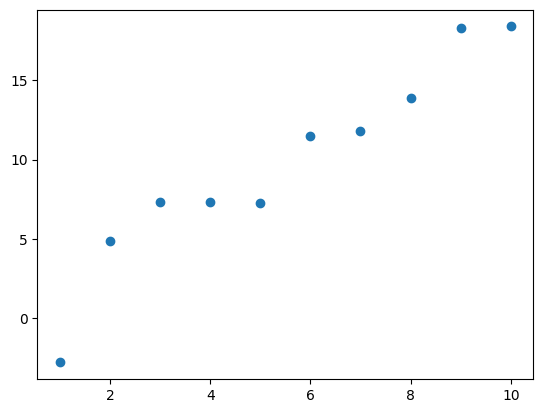

In [ ]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))

plt.scatter(X[0],X[1])

In [ ]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,2.000000,3.000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
1,-2.771945,4.848839,7.359,7.324349,7.273685,11.482666,11.827682,13.878311,18.309443,18.387899


Mean vector:  [5.5        9.79199277]
[[ -4.5         -3.5         -2.5         -1.5         -0.5
    0.5          1.5          2.5          3.5          4.5       ]
 [-12.56393799  -4.94315348  -2.43299294  -2.46764396  -2.51830814
    1.69067284   2.03568876   4.08631849   8.51745055   8.59590588]]


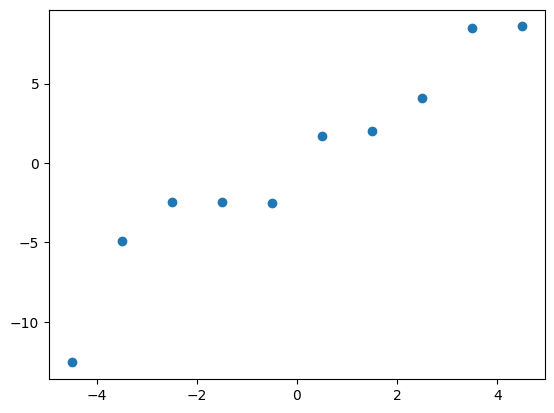

In [ ]:

Xcentered = X - X.mean(axis=1, keepdims=True)
m = np.mean(X, axis=1)

print("Mean vector: ", m)
print(Xcentered)

plt.scatter(Xcentered[0],Xcentered[1])

In [ ]:
import pandas as pd
pd.DataFrame(Xcentered)

,0,1,2,3,4,5,6,7,8,9
0,-4.500000,-3.500000,-2.500000,-1.500000,-0.500000,0.500000,1.500000,2.500000,3.500000,4.500000
1,-12.563938,-4.943153,-2.432993,-2.467644,-2.518308,1.690673,2.035689,4.086318,8.517451,8.595906


In [ ]:
covmat = np.cov(Xcentered)
np.cov(Xcentered)

array([[ 9.16666667, 18.60990885],
       [18.60990885, 41.19720725]])

In [ ]:
np.cov(Xcentered)[0,0]

9.166666666666666

In [ ]:
covmat = np.cov(Xcentered)
print(covmat, "\n")
print("Variance of X: ", np.cov(Xcentered)[0,0])
print("Variance of Y: ", np.cov(Xcentered)[1,1])
print("Covariance X and Y: ", np.cov(Xcentered)[0,1])

[[ 9.16666667 18.60990885]
 [18.60990885 41.19720725]] 

Variance of X:  9.166666666666666
Variance of Y:  41.1972072516198
Covariance X and Y:  18.609908850526196


In [ ]:
eignums, vecs = np.linalg.eig(covmat)
v = vecs[:,np.argmax(eignums)]
Xnew = np.dot(v,Xcentered)
print(Xnew)

[13.29599693  5.95231336  3.25380591  2.86834241  2.49743367 -1.74517489
 -2.47572734 -4.75655555 -9.20108288 -9.68935162]


In [ ]:
eignums

array([ 0.62959308, 49.73428084])

In [ ]:
vecs

array([[-0.90892543, -0.4169587 ],
       [ 0.4169587 , -0.90892543]])

In [ ]:
v

array([-0.4169587 , -0.90892543])

In [ ]:
n = 3 # number of the random variable element
Xrestored = np.dot(Xnew[n],v) + m
print('Restored: ', Xrestored)
print('Original: ', X[:,n])

Restored:  [4.30401969 7.1848834 ]
Original:  [4.        7.3243488]


In [ ]:
# Ensure Xrestored has the correct shape
shape = (2, 10)
Xrestored = np.zeros(shape)

# Restore each element step by step
for i in range(len(Xnew)):
    dot_product = np.dot(Xnew[i], v)  # Compute the dot product for the i-th row
    Xrestored[:,i] = dot_product + m  # Add the scalar or single element from the mean value
    print(f"Restored element {i}: {Xrestored[:,i]}")

Restored element 0: [-0.04388154 -2.29307702]
Restored element 1: [3.01813119 4.38178376]
Restored element 2: [4.14329733 6.83452582]
Restored element 3: [4.30401969 7.1848834 ]
Restored element 4: [4.45867332 7.52201179]
Restored element 5: [ 6.22766585 11.37822661]
Restored element 6: [ 6.53227604 12.04224431]
Restored element 7: [ 7.4832872  14.11534709]
Restored element 8: [ 9.33647152 18.15509103]
Restored element 9: [ 9.54005941 18.5988909 ]


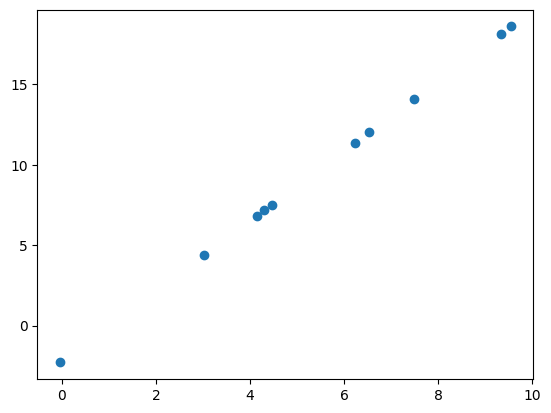

In [ ]:
plt.scatter(Xrestored[0],Xrestored[1])

In [ ]:
100 * max(eignums)/sum(eignums)

98.74991133348136

In [ ]:
from sklearn.decomposition import PCA

#Apply PCA with n_components=1 to transposed Xcentered
pca = PCA(n_components=1)
X_pca = pca.fit_transform(Xcentered.T)

In [ ]:
print(v)
print(pca.components_)

[-0.4169587  -0.90892543]
[[-0.4169587  -0.90892543]]


In [ ]:
pca.explained_variance_ratio_[0] * 100

98.74991133348135